# <center>OpenCV

In [1]:
import wget
import cv2
import plotly.express as px
import plotly.io as pio
import numpy as np
pio.renderers.default = 'png'
pio.templates.default = 'plotly_dark'

In [4]:
wget.download('https://cms.skillfactory.ru/assets/courseware/v1/143a99977cb65396ea32079539c11d85/asset-v1:SkillFactory+DSPR-CV+ALWAYS+type@asset+block/peshehod.jpeg', './data/')

'./data//peshehod.jpeg'

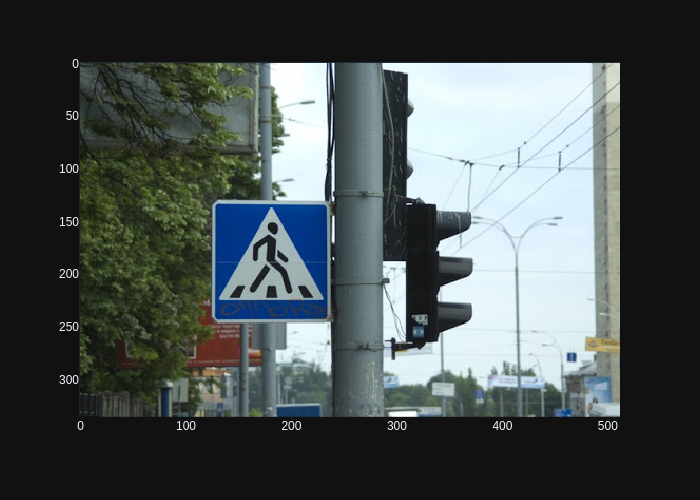

In [6]:
img = cv2.imread('./data/peshehod.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
px.imshow(img)

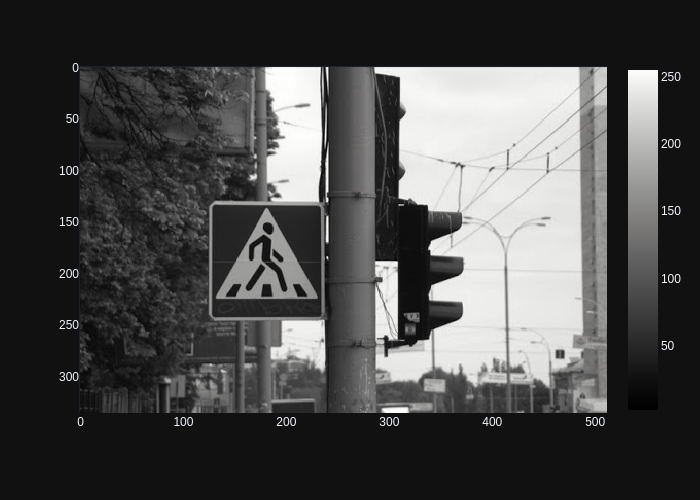

In [11]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
px.imshow(gray_img, color_continuous_scale=px.colors.cmocean.gray)

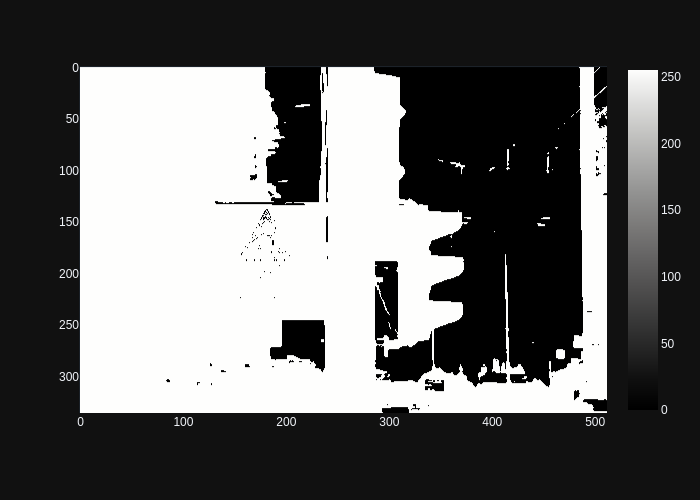

In [36]:
_, thresholded_img = cv2.threshold(gray_img, 180, 255, 1)
px.imshow(thresholded_img, color_continuous_scale=px.colors.cmocean.gray)

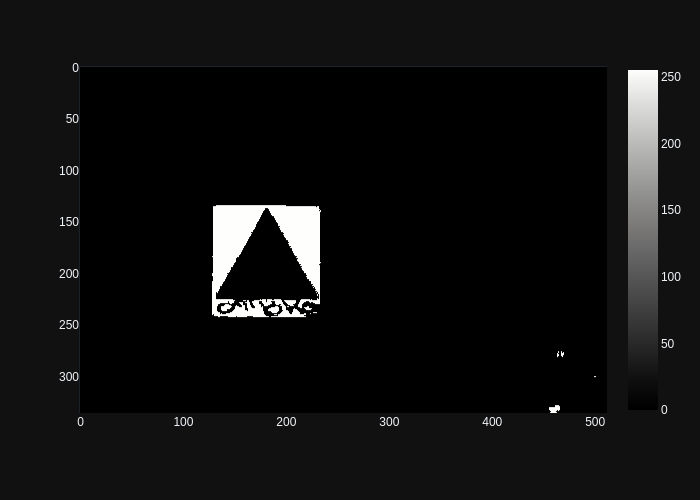

In [82]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
# mask blue hue
lower_bound = np.array([100, 150, 110])
upper_bound = np.array([130, 255, 255])
imagemask = cv2.inRange(hsv_img, lower_bound, upper_bound)
px.imshow(imagemask, color_continuous_scale=px.colors.cmocean.gray)

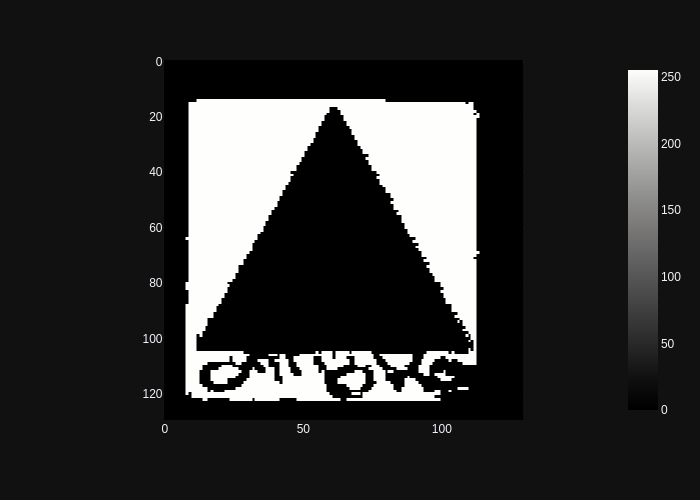

In [85]:
px.imshow(imagemask[120:250, 120:250], color_continuous_scale=px.colors.cmocean.gray)

In [92]:
print(f'Total pixels in mask: {imagemask.size}')

Total pixels in mask: 172032


# <center>SKIMAGE

In [2]:
wget.download('https://lms-cdn.skillfactory.ru/assets/courseware/v1/dc94c62202c54b6c1a0b3a491e1bd8f8/asset-v1:SkillFactory+DSPR-CV+ALWAYS+type@asset+block/dark_megan.jpeg', './data/')
wget.download('https://lms-cdn.skillfactory.ru/assets/courseware/v1/22341cce6d5b89f695920942c0cfbcc4/asset-v1:SkillFactory+DSPR-CV+ALWAYS+type@asset+block/megan.jpeg', './data/')

'./data//megan.jpeg'

In [3]:
import skimage
from skimage.exposure import match_histograms

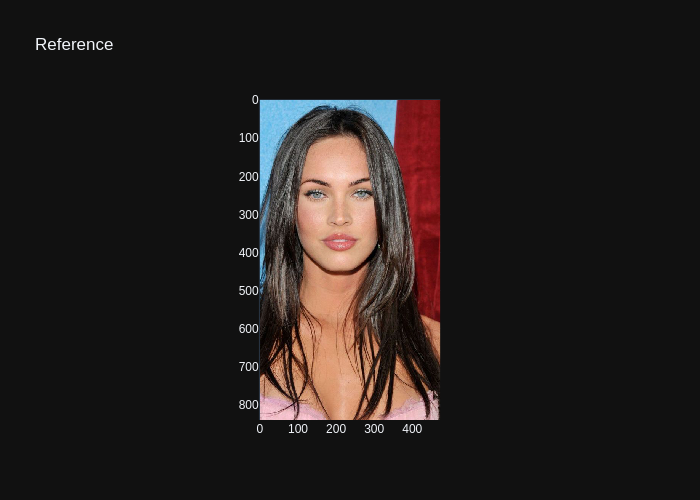

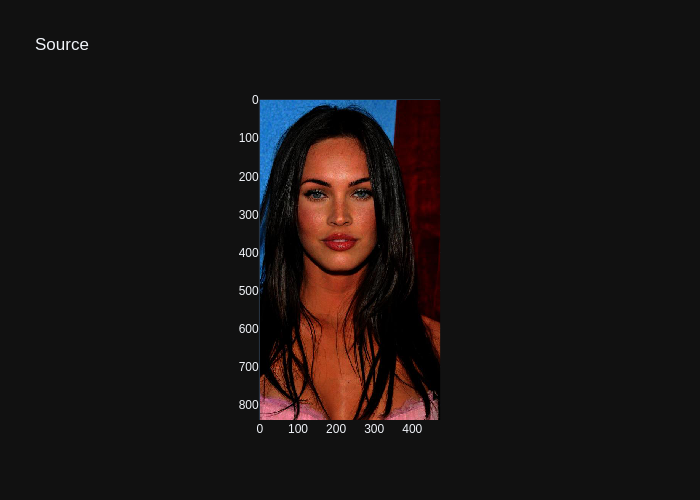

In [7]:
megan = skimage.io.imread('./data/megan.jpeg')
dark_megan =  skimage.io.imread('./data/dark_megan.jpeg')
px.imshow(megan, title='Reference').show()
px.imshow(dark_megan, title='Source')

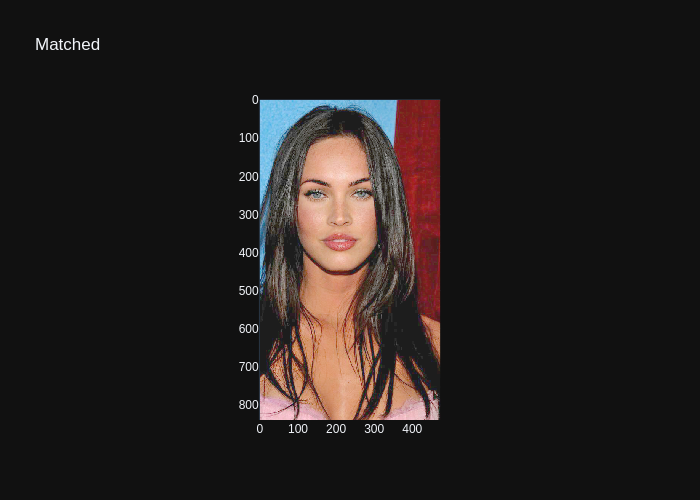

In [8]:
matched = match_histograms(dark_megan, megan)
px.imshow(matched, title='Matched')

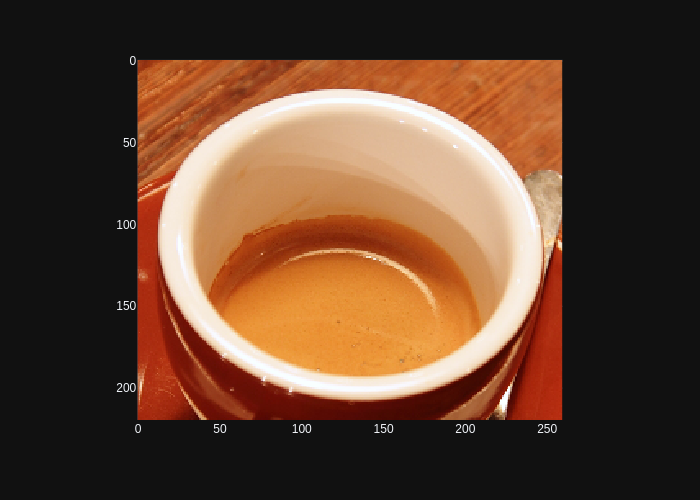

In [10]:
from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

image_rgb = data.coffee()[0:220, 160:420]
px.imshow(image_rgb)

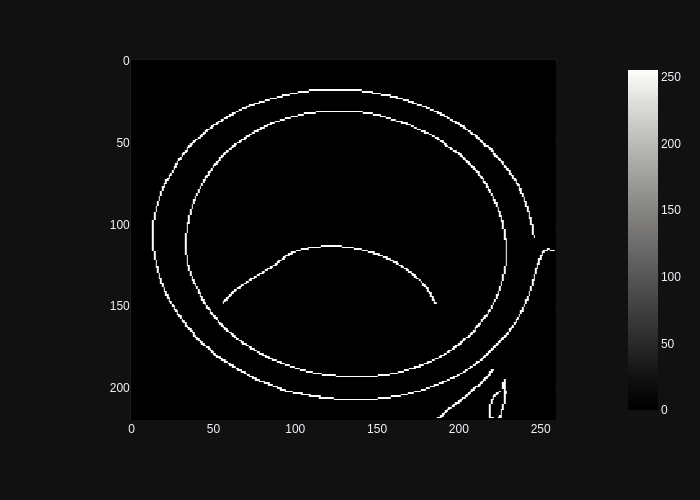

In [33]:
image_gray = skimage.color.rgb2gray(image_rgb)
edges = canny(image_gray, sigma=4)
px.imshow(edges, color_continuous_scale=px.colors.cmocean.gray)